In [207]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
from sklearn.model_selection  import train_test_split
from sklearn import svm
from sklearn.linear_model import LinearRegression

In [208]:
vehicle=pd.read_csv('/content/vehicle.csv')

In [209]:
vehicle.head(2)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van


In [210]:
vehicle.groupby(["class"]).count()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
class,,,,,,,,,,,,,,,,,,
bus,218,214,215,216,217,218,218,218,217,218,218,218,216,217,214,218,218,218
car,429,428,429,426,428,429,428,428,428,429,427,427,429,426,427,428,428,429
van,199,199,198,198,199,199,199,199,198,199,198,199,199,199,199,199,199,199


In [212]:
vehicle.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

In [213]:
print(vehicle.isnull().sum())

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64


In [214]:
vehicle.isnull().values.any() ## For checking the null values

True

In [188]:
#medianfilter=lambda x: x.fillna(x.median())
#vehicle=vehicle.apply(medianfilter,axis=0)

In [215]:
# Since the null values are present in the system, and I applying median filter but I found dropping the NaN value was giving far better accuracy 
# than median filter
vehicle = vehicle.dropna() 
vehicle.count()

compactness                    813
circularity                    813
distance_circularity           813
radius_ratio                   813
pr.axis_aspect_ratio           813
max.length_aspect_ratio        813
scatter_ratio                  813
elongatedness                  813
pr.axis_rectangularity         813
max.length_rectangularity      813
scaled_variance                813
scaled_variance.1              813
scaled_radius_of_gyration      813
scaled_radius_of_gyration.1    813
skewness_about                 813
skewness_about.1               813
skewness_about.2               813
hollows_ratio                  813
class                          813
dtype: int64

In [216]:
replaceStruct={"class":{"bus":1,"car":2,"van":3}}

In [217]:
vehicle=vehicle.replace(replaceStruct)

In [218]:
vehicle.head(1)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,3


In [219]:
vehicle['class']=vehicle['class'].astype('float64') # converting object type to float type

In [220]:
vehicle.corr()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
compactness,1.000000,0.689885,0.789955,0.688130,0.090557,0.150369,0.814026,-0.788051,0.814227,0.674902,0.764386,0.820240,0.581405,-0.258437,0.231648,0.168384,0.296195,0.372806,-0.037391
circularity,0.689885,1.000000,0.797704,0.623950,0.155023,0.251619,0.858149,-0.825108,0.856137,0.965366,0.806108,0.850932,0.935594,0.049070,0.141726,-0.001975,-0.113902,0.049331,-0.161018
distance_circularity,0.789955,0.797704,1.000000,0.771404,0.163386,0.265591,0.909023,-0.912713,0.897261,0.773459,0.865683,0.891789,0.705689,-0.238145,0.110280,0.277851,0.145258,0.343228,-0.067445
radius_ratio,0.688130,0.623950,0.771404,1.000000,0.667375,0.452460,0.743470,-0.795761,0.716210,0.570478,0.806788,0.731773,0.544636,-0.175348,0.044693,0.178079,0.375591,0.470895,-0.199219
pr.axis_aspect_ratio,0.090557,0.155023,0.163386,0.667375,1.000000,0.652093,0.113696,-0.191193,0.086992,0.133553,0.290375,0.100668,0.135663,0.173060,-0.059244,-0.040769,0.229702,0.257566,-0.114292
max.length_aspect_ratio,0.150369,0.251619,0.265591,0.452460,0.652093,1.000000,0.171445,-0.183242,0.167514,0.309180,0.331124,0.150069,0.197179,0.308329,0.016461,0.041210,-0.030543,0.139283,0.202235
scatter_ratio,0.814026,0.858149,0.909023,0.743470,0.113696,0.171445,1.000000,-0.973413,0.991992,0.808154,0.950067,0.996396,0.795748,-0.045632,0.070118,0.227375,0.009967,0.138424,-0.287590
elongatedness,-0.788051,-0.825108,-0.912713,-0.795761,-0.191193,-0.183242,-0.973413,1.000000,-0.950345,-0.771099,-0.937846,-0.956858,-0.761563,0.119750,-0.046621,-0.201325,-0.117568,-0.233408,0.342712
pr.axis_rectangularity,0.814227,0.856137,0.897261,0.716210,0.086992,0.167514,0.991992,-0.950345,1.000000,0.811979,0.935653,0.992119,0.792895,-0.033769,0.078701,0.231171,-0.017383,0.117202,-0.255354
max.length_rectangularity,0.674902,0.965366,0.773459,0.570478,0.133553,0.309180,0.808154,-0.771099,0.811979,1.000000,0.744760,0.796230,0.865240,0.031098,0.130356,0.013045,-0.108019,0.086792,-0.025539


In [221]:
x=vehicle.drop(['class','scaled_radius_of_gyration'],axis=1)
y=vehicle[['class']]
[x_train,x_test,y_train,y_test]=train_test_split(x,y,test_size=0.3,random_state=100)
##scaled_radius_of_gyration	 can also be dropped since it has high correlation with circularity

In [283]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
a_SVC=format(svc.score(x_test, y_test))
print("Accuracy on training set: {:.2f}".format(svc.score(x_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(x_test, y_test)))

Accuracy on training set: 0.66
Accuracy on test set: 0.66


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [223]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)
## Applying min max scalor was giving better accuracy

In [224]:
y_pred=svc.predict(x_test_scaled)

In [285]:
svc = SVC()
svc.fit(x_train_scaled, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(x_train_scaled, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(x_test_scaled, y_test)))
a_SVC_scalor=format(svc.score(x_test_scaled, y_test))

Accuracy on training set: 0.95
Accuracy on test set: 0.95


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
## K cross fold validtion

In [56]:
vehicle.head(1)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,3.0


In [282]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np

#array = dataframe.values
#X = array[:,0:8]
#Y = array[:,8]

#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

num_folds = 10
seed = 7

kfold = KFold(n_splits=num_folds, random_state=seed)
model = SVC()
results = cross_val_score(model, x, y, cv=kfold)
print(results)
a_SVC_kfold=results.mean()
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ),

[0.64634146 0.64634146 0.70731707 0.62962963 0.61728395 0.75308642
 0.74074074 0.60493827 0.7037037  0.72839506]
Accuracy: 67.778% (5.196%)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [ ]:
## Applying the PCA

In [227]:
from sklearn.decomposition import PCA

In [228]:
X=x
from scipy.stats import zscore
XScaled=X.apply(zscore)
XScaled.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.163231,0.520408,0.060669,0.264970,1.283254,0.299721,-0.198517,0.129648,-0.217151,0.766312,-0.397397,-0.339014,-0.321192,-0.071523,0.371287,-0.321809,0.171837
1,-0.322874,-0.619123,0.124067,-0.836393,-0.599253,0.085785,-0.591720,0.514333,-0.606014,-0.337462,-0.590034,-0.618754,-0.053505,0.538425,0.147109,0.003400,0.442318
2,1.256966,0.845988,1.518823,1.187734,0.530251,0.299721,1.162569,-1.152637,0.949438,0.697326,1.111591,1.122486,0.080339,1.555006,-0.413338,-0.159204,0.036596
3,-0.079822,-0.619123,-0.002729,-0.300595,0.153750,0.085785,-0.742952,0.642562,-0.606014,-0.337462,-0.911095,-0.738643,-1.258099,-0.071523,-0.301249,1.629444,1.524243
4,-1.052030,-0.130753,-0.763506,1.068668,5.173770,9.285029,-0.591720,0.514333,-0.606014,-0.268476,1.689501,-0.647299,7.307905,0.538425,-0.189159,-1.460039,-1.721531


In [229]:
covMatrix = np.cov(XScaled,rowvar=False)
print(covMatrix)

[[ 1.00123153  0.69073497  0.79092746  0.68897729  0.09066804  0.1505537
   0.81502868 -0.78902127  0.81522961  0.67573322  0.76532752  0.82125027
  -0.25875528  0.23193313  0.16859183  0.29656022  0.3732647 ]
 [ 0.69073497  1.00123153  0.79868656  0.62471862  0.15521415  0.25192897
   0.85920548 -0.8261242   0.85719089  0.96655501  0.80710097  0.85197956
   0.0491303   0.1419004  -0.00197723 -0.1140426   0.04939203]
 [ 0.79092746  0.79868656  1.00123153  0.77235395  0.16358689  0.26591783
   0.91014241 -0.9138366   0.89836576  0.77441118  0.86674929  0.89288735
  -0.23843852  0.11041593  0.278193    0.14543699  0.34365085]
 [ 0.68897729  0.62471862  0.77235395  1.00123153  0.66819724  0.45301698
   0.74438595 -0.79674104  0.71709175  0.57118076  0.80778118  0.73267385
  -0.17556405  0.04474816  0.17829807  0.37605357  0.47147529]
 [ 0.09066804  0.15521415  0.16358689  0.66819724  1.00123153  0.6528959
   0.11383635 -0.19142882  0.08709873  0.13371753  0.29073296  0.10079166
   0.17327

In [237]:
pca = PCA(n_components=10)
pca.fit(XScaled)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [238]:
print(pca.explained_variance_)

[8.7919133  2.85439616 1.91485376 1.1213984  0.92470435 0.52460155
 0.3080957  0.21851455 0.14892657 0.06512552]


In [239]:
print(pca.explained_variance_ratio_)

[0.51653524 0.16769913 0.11249991 0.06588347 0.05432747 0.03082096
 0.01810098 0.01283799 0.00874961 0.0038262 ]


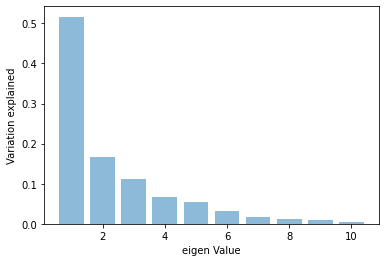

In [254]:
plt.bar(list(range(1,11)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

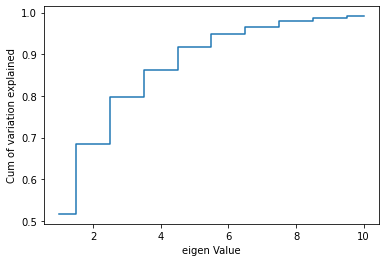

In [255]:
plt.step(list(range(1,11)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

In [265]:
##As you can see where you get max variance explained is eigen value as 8
pca8 = PCA(n_components=8)
pca8.fit(XScaled)
print(pca8.components_)
print(pca8.explained_variance_ratio_)
Xpca8 = pca8.transform(XScaled)

[[ 2.88835189e-01  2.96920614e-01  3.17907472e-01  2.84525157e-01
   8.95253186e-02  1.03653804e-01  3.27726126e-01 -3.25473118e-01
   3.24259025e-01  2.85070443e-01  3.19920549e-01  3.24990129e-01
  -3.84439217e-02  3.91797962e-02  7.34592586e-02  4.65355594e-02
   9.66693932e-02]
 [-1.04547062e-01  1.50519209e-01 -4.53265632e-02 -1.50894429e-01
  -8.60307942e-02  5.16191294e-02  7.56257711e-02 -1.37263567e-02
   8.85702307e-02  1.37482578e-01  9.59953974e-02  7.89674946e-02
   5.11132749e-01 -6.86187235e-02 -1.00149226e-01 -5.56504263e-01
  -5.45644157e-01]
 [-1.17385605e-01 -3.96099390e-02 -5.88508965e-02  2.81798282e-01
   6.48207659e-01  5.83835835e-01 -1.05768323e-01  6.18915932e-02
  -1.19578875e-01 -2.73899444e-02  5.20010812e-02 -1.16694924e-01
   2.62805222e-01 -1.03782179e-01 -8.68765101e-02  4.57284579e-02
   6.98278927e-02]
 [ 1.14777235e-01  2.01042577e-01 -5.08625150e-02 -4.66245460e-02
   8.97146038e-03  4.64445946e-02 -6.47320026e-02  6.63972566e-02
  -5.93363995e-02  

In [288]:
regression_model = SVC()
regression_model.fit(XScaled, y)
regression_model.score(XScaled, y)
a_SVC_all=regression_model.score(XScaled, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [281]:
regression_model_pca = SVC()
regression_model_pca.fit(Xpca8, y)
a_SVC_PCA=regression_model_pca.score(Xpca8, y)
regression_model_pca.score(Xpca8, y)
## Optimised value of k is 8


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.965559655596556

In [296]:
results=pd.DataFrame(data={'Model':['Accuracy'],'SVC_raw':[a_SVC],'SVC_min_maxscalo_Transform':[a_SVC_scalor],'svc_scaled_allPCA':[a_SVC_all],'PCA':[8],'SVC_PCA':[a_SVC_PCA]})
results

,Model,SVC_raw,SVC_min_maxscalo_Transform,svc_scaled_allPCA,PCA,SVC_PCA
0,Accuracy,0.6598360655737705,0.9467213114754098,0.98032,8,0.96556
